## LETS GROW MORE
### Data Science Internship(LGM VIP-SEPT 2021)

## Task 6: Prediction using Decision Tree  Algorithm

##### By - Vrushabh Rode

### Importing Libraries and Dataset

In [48]:
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Basic EDA

In [6]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [52]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


### Preprocessing data

In [8]:
from sklearn import preprocessing

In [9]:
label_encoder = preprocessing.LabelEncoder()

In [12]:
data['Species']= label_encoder.fit_transform(data['Species'])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [13]:
data.drop(columns='Id',inplace=True)

### Model Selection

In [28]:
X=data.iloc[:,:-1]
Y=data['Species']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.2, random_state=40)

### Model Building

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
model = DecisionTreeClassifier()

In [34]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
Y_pred = model.predict(X_test)
data2 = pd.DataFrame({"Actual":y_test,"Predicted":Y_pred})
data2.head()

,Actual,Predicted
38,0,0
66,1,1
115,2,2
117,2,2
89,1,1


In [43]:
# Testing the accuracy of model prediction
from sklearn.metrics import accuracy_score
a=accuracy_score(y_test,Y_pred)*100
a

100.0

[Text(167.4, 199.32, 'Petal width <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [42, 38, 40]\nclass = Setosa'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = Setosa'),
 Text(193.15384615384616, 163.07999999999998, 'Petal width <= 1.75\ngini = 0.5\nsamples = 78\nvalue = [0, 38, 40]\nclass = Virginica'),
 Text(103.01538461538462, 126.83999999999999, 'Petal length <= 4.95\ngini = 0.21\nsamples = 42\nvalue = [0, 37, 5]\nclass = Versicolor'),
 Text(51.50769230769231, 90.6, 'Petal width <= 1.65\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]\nclass = Versicolor'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Versicolor'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(154.52307692307693, 90.6, 'Petal width <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = Virginica'),
 Text(128.76923076923077, 54.35999

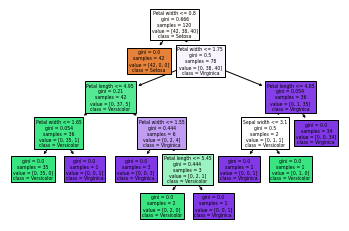

In [46]:
from sklearn.tree import plot_tree
# Plotting
f_n = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
c_n = ["Setosa", "Versicolor", "Virginica"]
plot_tree(model,feature_names = f_n, class_names = c_n , filled = True)

In [50]:
from sklearn import tree

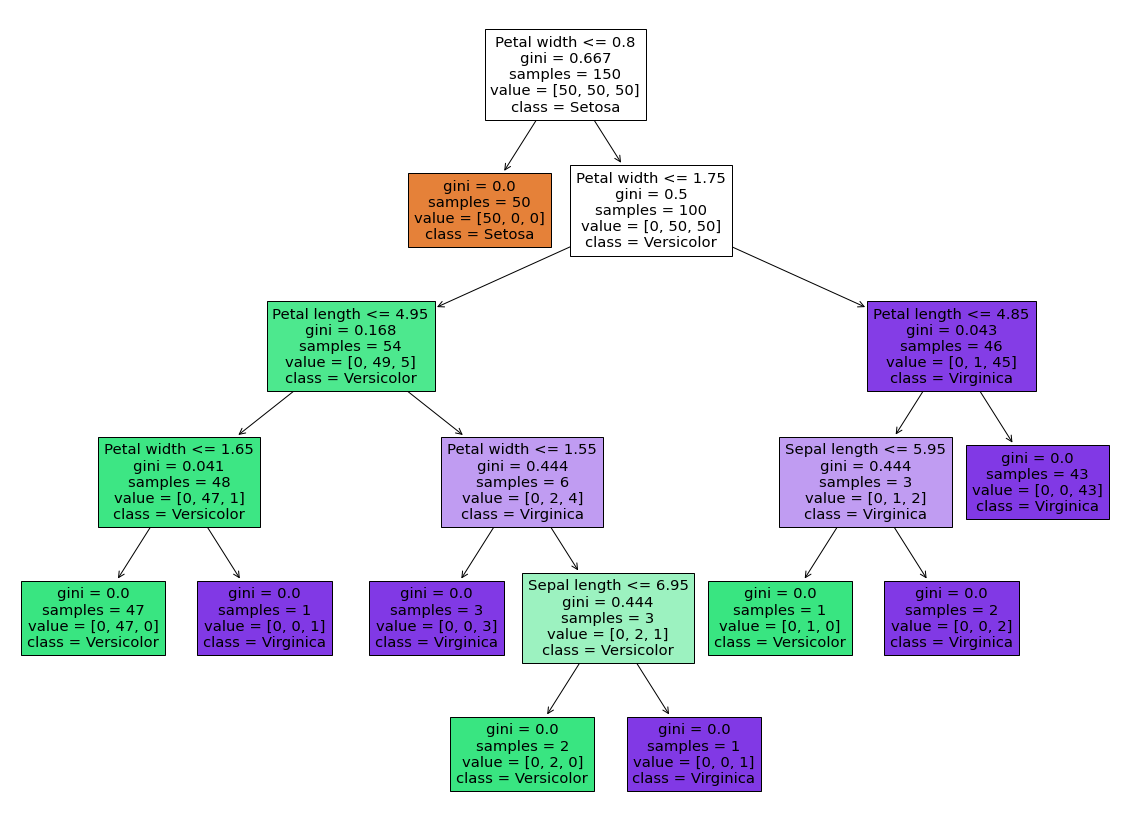

In [51]:
modelx= DecisionTreeClassifier().fit(X,Y)
plt.figure(figsize = (20,15))
tree = tree.plot_tree(modelx, feature_names = f_n, class_names = c_n, filled = True)

##### Thank You !!!